# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# creating a empty list for collecting the data

ba_reviews = []

ba_stars = []

ba_date = []

ba_country = []

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

ba_pages = 37

page_size = 100

for i in range(1,ba_pages+1):
    print(f"Scrapping Page {i}")
    
    #Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    #Collect HTML Data from this page
    response = requests.get(url)
    
    # Parse content
    soup = BeautifulSoup(response.content, "html.parser")
    
    #print(soup.prettify())
    
    for item in soup.find_all("div", {"class": "text_content"}):
        ba_reviews.append(item.get_text())
        
    for item in soup.find_all("div",{"class":"rating-10"}):
        try:
            ba_stars.append(item.span.text)
        except:
            print(f"Error on Page {i}")
            ba_stars.append(item.text)
            
    for item in soup.find_all("time"):
        ba_date.append(item.text)
        
    for item in soup.find_all("h3"):
        ba_country.append(item.span.next_sibling.text.strip(" ()"))

Scrapping Page 1
Scrapping Page 2
Scrapping Page 3
Scrapping Page 4
Scrapping Page 5
Scrapping Page 6
Scrapping Page 7
Scrapping Page 8
Scrapping Page 9
Scrapping Page 10
Scrapping Page 11
Scrapping Page 12
Scrapping Page 13
Scrapping Page 14
Scrapping Page 15
Scrapping Page 16
Scrapping Page 17
Scrapping Page 18
Scrapping Page 19
Scrapping Page 20
Scrapping Page 21
Scrapping Page 22
Scrapping Page 23
Scrapping Page 24
Scrapping Page 25
Scrapping Page 26
Scrapping Page 27
Scrapping Page 28
Scrapping Page 29
Scrapping Page 30
Scrapping Page 31
Error on Page 31
Scrapping Page 32
Error on Page 32
Error on Page 32
Scrapping Page 33
Scrapping Page 34
Scrapping Page 35
Error on Page 35
Error on Page 35
Scrapping Page 36
Scrapping Page 37


In [4]:
len(ba_reviews)

3621

In [5]:
len(ba_stars)

3658

In [6]:
ba_stars = ba_stars[:len(ba_reviews)]

In [7]:
len(ba_stars)

3621

In [8]:
ba_data = pd.DataFrame({"review":ba_reviews,"stars":ba_stars,"date":ba_date,"country":ba_country})

In [9]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   3621 non-null   object
 1   stars    3621 non-null   object
 2   date     3621 non-null   object
 3   country  3621 non-null   object
dtypes: object(4)
memory usage: 113.3+ KB


In [10]:
ba_data.head()

review  \
0  ✅ Trip Verified |  Good domestic flight operat...   
1  Not Verified | Failed at all basic travel fund...   
2  ✅ Trip Verified |  They lost my baggage in a v...   
3  ✅ Trip Verified |  Late boarding led to a one ...   
4  ✅ Trip Verified | As usual the flight is delay...   

                           stars             date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  8th August 2023  United Kingdom  
1                             10  8th August 2023          Canada  
2                              1  8th August 2023          Poland  
3                              1  5th August 2023  United Kingdom  
4                              1  4th August 2023  United Kingdom

In [11]:
ba_data['verified'] = ba_data.review.str.contains("Trip Verified")

In [12]:
ba_data.head()

review  \
0  ✅ Trip Verified |  Good domestic flight operat...   
1  Not Verified | Failed at all basic travel fund...   
2  ✅ Trip Verified |  They lost my baggage in a v...   
3  ✅ Trip Verified |  Late boarding led to a one ...   
4  ✅ Trip Verified | As usual the flight is delay...   

                           stars             date         country  verified  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  8th August 2023  United Kingdom      True  
1                             10  8th August 2023          Canada     False  
2                              1  8th August 2023          Poland      True  
3                              1  5th August 2023  United Kingdom      True  
4                              1  4th August 2023  United Kingdom      True

In [13]:
#ba_data.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Cleaning Reviews

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
#for lemmatization of words we will use nltk library

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
review_data = ba_data.review.str.strip("✅ Trip Verified |")

In [20]:
review_data.head()

0    Good domestic flight operated by BA Cityflyer....
1    Not Verified | Failed at all basic travel fund...
2    hey lost my baggage in a very simple situation...
3      Late boarding led to a one hour flight leavi...
4    As usual the flight is delayed. BA try to blam...
Name: review, dtype: object

In [21]:
corpus = []

In [22]:
for rev in review_data:
    rev = re.sub('[^a-zA-Z]',' ',rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [23]:
ba_data['corpus'] = corpus

In [24]:
ba_data.head()

review  \
0  ✅ Trip Verified |  Good domestic flight operat...   
1  Not Verified | Failed at all basic travel fund...   
2  ✅ Trip Verified |  They lost my baggage in a v...   
3  ✅ Trip Verified |  Late boarding led to a one ...   
4  ✅ Trip Verified | As usual the flight is delay...   

                           stars             date         country  verified  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  8th August 2023  United Kingdom      True   
1                             10  8th August 2023          Canada     False   
2                              1  8th August 2023          Poland      True   
3                              1  5th August 2023  United Kingdom      True   
4                              1  4th August 2023  United Kingdom      True   

                                              corpus  
0  good domestic flight operated ba cityflyer gro...  
1  verified failed basic travel fundamental fligh...  
2  hey lost baggage simple situation three week c...  
3  late boarding led one hour flight leaving two ...  
4  usual flight delayed ba try blame someone inab...

In [25]:
#Cleaning/Formatting date

In [26]:
ba_data['date'] = pd.to_datetime(ba_data.date)

In [27]:
ba_data.head()

review  \
0  ✅ Trip Verified |  Good domestic flight operat...   
1  Not Verified | Failed at all basic travel fund...   
2  ✅ Trip Verified |  They lost my baggage in a v...   
3  ✅ Trip Verified |  Late boarding led to a one ...   
4  ✅ Trip Verified | As usual the flight is delay...   

                           stars       date         country  verified  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5 2023-08-08  United Kingdom      True   
1                             10 2023-08-08          Canada     False   
2                              1 2023-08-08          Poland      True   
3                              1 2023-08-05  United Kingdom      True   
4                              1 2023-08-04  United Kingdom      True   

                                              corpus  
0  good domestic flight operated ba cityflyer gro...  
1  verified failed basic travel fundamental fligh...  
2  hey lost baggage simple situation three week c...  
3  late boarding led one hour flight leaving two ...  
4  usual flight delayed ba try blame someone inab...

In [28]:
# cleaning the stars

ba_data.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '10', '1', '9', '6', '2', '4',
       '8', '3', '7', '5',
       '\r\n                        na\r\n                    '],
      dtype=object)

In [29]:
ba_data.stars =ba_data.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [30]:
ba_data.stars.unique()

array(['5', '10', '1', '9', '6', '2', '4', '8', '3', '7',
       '\r\n                        na\r\n                    '],
      dtype=object)

In [31]:
ba_data.stars.value_counts()

1                                                         822
2                                                         414
3                                                         399
8                                                         356
10                                                        316
9                                                         308
7                                                         307
5                                                         265
4                                                         244
6                                                         185
\r\n                        na\r\n                          5
Name: stars, dtype: int64

In [32]:
ba_data.drop(ba_data[ba_data.stars=="\r\n                        na\r\n                    "].index,axis = 0,inplace = True)

In [33]:
ba_data.stars.value_counts()

1     822
2     414
3     399
8     356
10    316
9     308
7     307
5     265
4     244
6     185
Name: stars, dtype: int64

In [34]:
ba_data.stars.unique()

array(['5', '10', '1', '9', '6', '2', '4', '8', '3', '7'], dtype=object)

In [35]:
ba_data.country.isnull().value_counts()

False    3616
Name: country, dtype: int64

In [36]:
#drop the rows using index where the country value is null
ba_data.drop(ba_data[ba_data.country.isnull() == True].index, axis=0, inplace=True)

In [37]:
ba_data.reset_index(drop=True)

review stars       date  \
0     ✅ Trip Verified |  Good domestic flight operat...     5 2023-08-08   
1     Not Verified | Failed at all basic travel fund...    10 2023-08-08   
2     ✅ Trip Verified |  They lost my baggage in a v...     1 2023-08-08   
3     ✅ Trip Verified |  Late boarding led to a one ...     1 2023-08-05   
4     ✅ Trip Verified | As usual the flight is delay...     1 2023-08-04   
...                                                 ...   ...        ...   
3611  Flew return in CW from LHR to BKK in August 20...     8 2012-08-29   
3612  LHR to HAM. Purser addresses all club passenge...     7 2012-08-28   
3613  My son who had worked for British Airways urge...     1 2011-10-12   
3614  London City-New York JFK via Shannon on A318 b...     9 2011-10-11   
3615  SIN-LHR BA12 B747-436 First Class. Old aircraf...     8 2011-10-09   

             country  verified  \
0     United Kingdom      True   
1             Canada     False   
2             Poland      True   
3     United Kingdom      True   
4     United Kingdom      True   
...              ...       ...   
3611         Ireland     False   
3612  United Kingdom     False   
3613  United Kingdom     False   
3614   United States     False   
3615  United Kingdom     False   

                                                 corpus  
0     good domestic flight operated ba cityflyer gro...  
1     verified failed basic travel fundamental fligh...  
2     hey lost baggage simple situation three week c...  
3     late boarding led one hour flight leaving two ...  
4     usual flight delayed ba try blame someone inab...  
...                                                 ...  
3611  flew return cw lhr bkk august positive flight ...  
3612  lhr ham purser address club passenger name boa...  
3613  son worked british airway urged fly british ai...  
3614  london city new york jfk via shannon really ni...  
3615  sin lhr ba b first class old aircraft seat pri...  

[3616 rows x 6 columns]

## EDA

In [38]:
!pip install wordcloud

In [39]:
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

Text(0.5, 0.98, 'Counts for each ratings')

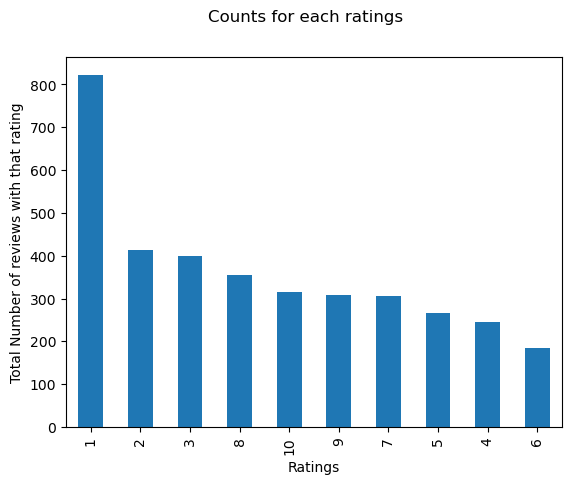

In [40]:
# Total Counts of Each rating with graph

custom_colors = ['red', 'green', 'blue', 'purple']


ba_data.stars.value_counts().plot(kind = 'bar')

plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")


In [41]:
ba_ratings = pd.DataFrame(ba_data.stars.value_counts())

#ba_rating_percent = (ba_rating.)

In [42]:
ba_ratings.head()

stars
1     822
2     414
3     399
8     356
10    316

In [43]:
ba_rating_percent = [round(x,2) for x in (ba_ratings.stars.values/ba_ratings.stars.values.sum()*100).tolist() ]

In [44]:
ba_ratings['percentage'] = ba_rating_percent

In [45]:
ba_ratings

stars  percentage
1     822       22.73
2     414       11.45
3     399       11.03
8     356        9.85
10    316        8.74
9     308        8.52
7     307        8.49
5     265        7.33
4     244        6.75
6     185        5.12

In [46]:
ba_country_review = pd.DataFrame(ba_data.country.value_counts().head(10)).reset_index()

In [47]:
ba_country_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    10 non-null     object
 1   country  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [48]:
ba_country_review.rename(columns = {'index':'country','country':'total_reviews'},inplace = True)

In [49]:
ba_country_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        10 non-null     object
 1   total_reviews  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


Text(0.5, 1.0, 'Maximum number of review by country')

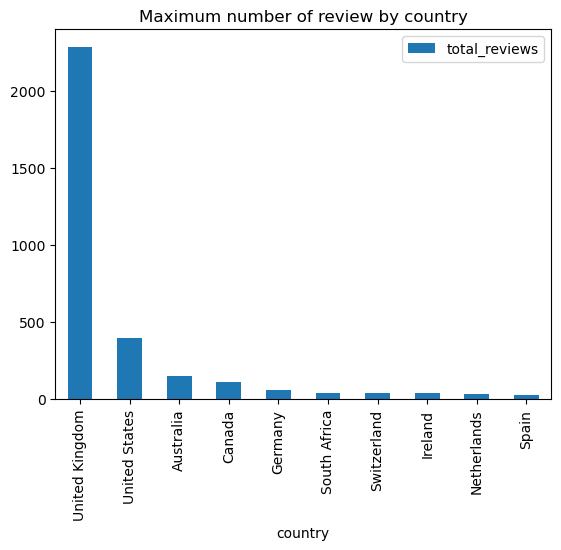

In [50]:
ba_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [51]:
# Averagew highest rating

In [52]:
ba_data.head()

review stars       date  \
0  ✅ Trip Verified |  Good domestic flight operat...     5 2023-08-08   
1  Not Verified | Failed at all basic travel fund...    10 2023-08-08   
2  ✅ Trip Verified |  They lost my baggage in a v...     1 2023-08-08   
3  ✅ Trip Verified |  Late boarding led to a one ...     1 2023-08-05   
4  ✅ Trip Verified | As usual the flight is delay...     1 2023-08-04   

          country  verified                                             corpus  
0  United Kingdom      True  good domestic flight operated ba cityflyer gro...  
1          Canada     False  verified failed basic travel fundamental fligh...  
2          Poland      True  hey lost baggage simple situation three week c...  
3  United Kingdom      True  late boarding led one hour flight leaving two ...  
4  United Kingdom      True  usual flight delayed ba try blame someone inab...

In [53]:
ba_country_rating = pd.DataFrame(ba_data.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [54]:
ba_country_rating

country          stars
0    United States            inf
1   United Kingdom            inf
2        Australia  2.047902e+161
3           Canada  9.385272e+119
4          Germany   3.069663e+62
..             ...            ...
67       Indonesia   2.000000e+00
68          Jordan   2.000000e+00
69            Laos   1.000000e+00
70         Bahrain   1.000000e+00
71         Vietnam   1.000000e+00

[72 rows x 2 columns]

In [55]:
ba_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

In [56]:
ba_country_rating

country     avg_rating
0    United States            inf
1   United Kingdom            inf
2        Australia  2.047902e+161
3           Canada  9.385272e+119
4          Germany   3.069663e+62
..             ...            ...
67       Indonesia   2.000000e+00
68          Jordan   2.000000e+00
69            Laos   1.000000e+00
70         Bahrain   1.000000e+00
71         Vietnam   1.000000e+00

[72 rows x 2 columns]

### Time Series Analysis

In [57]:
ba_data.date = pd.to_datetime(ba_data.date)

In [58]:
fig = px.line(ba_data, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()


It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

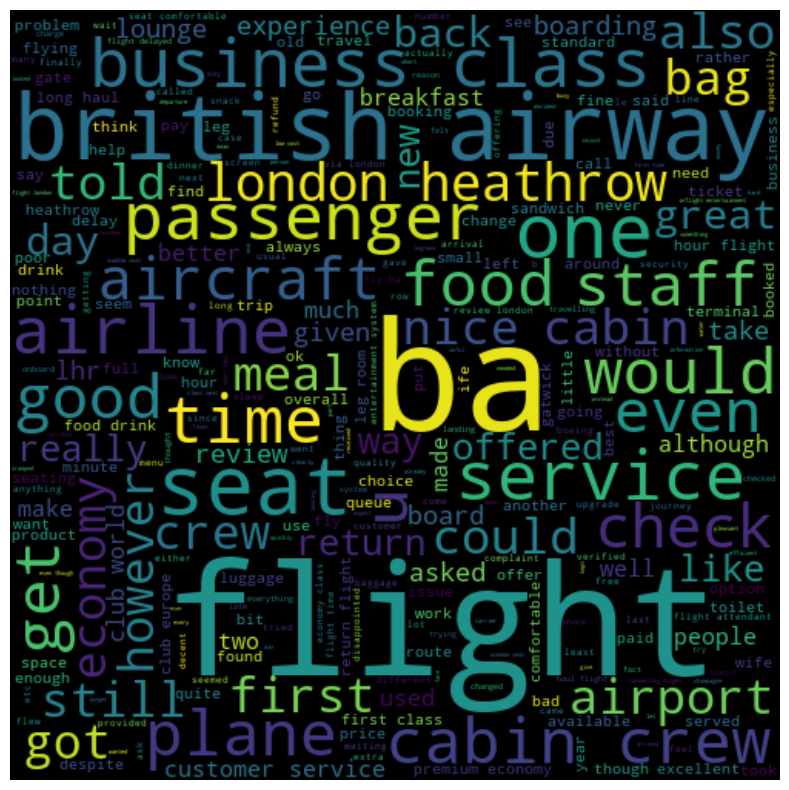

In [59]:
reviews = " ".join(ba_data.corpus)
plt.figure(figsize = (15,10))
stopwords = set(stopwords.words('english'))

wordcloud=WordCloud(height = 500,width = 500,max_font_size = 100,max_words= 300,stopwords = stopwords).generate(reviews)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()


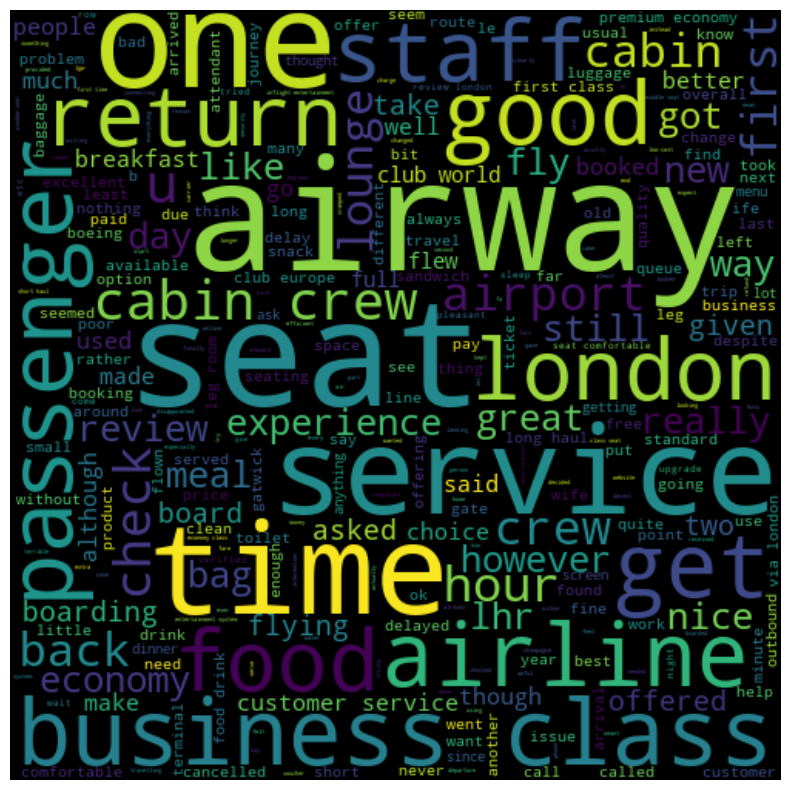

In [60]:
reviews = " ".join(ba_data.corpus)
plt.figure(figsize=(20,10))

#stopwords = set(stopwords.words('english'))

stopwords.update(["ba","flight","british","airways","airlines","plane","told","also","passenger"\
                 "london","heathrow","aircraft","could","even","would"])

wordcloud=WordCloud(height = 500,width = 500,max_font_size = 100,max_words= 300,stopwords = stopwords).generate(reviews)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [61]:
# Word Frequency

In [62]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
words = reviews.split(" ")

In [64]:
stopwords = text.ENGLISH_STOP_WORDS.union(['flight','ba','passenger','u','london','airway','british','airline',\
                                          'heathrow','plane','lhr','review'])

new_words = [word for word in words if word not in stopwords]

nlp_ba_words = FreqDist(new_words).most_common(20)

all_fdist = pd.Series(dict(nlp_ba_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

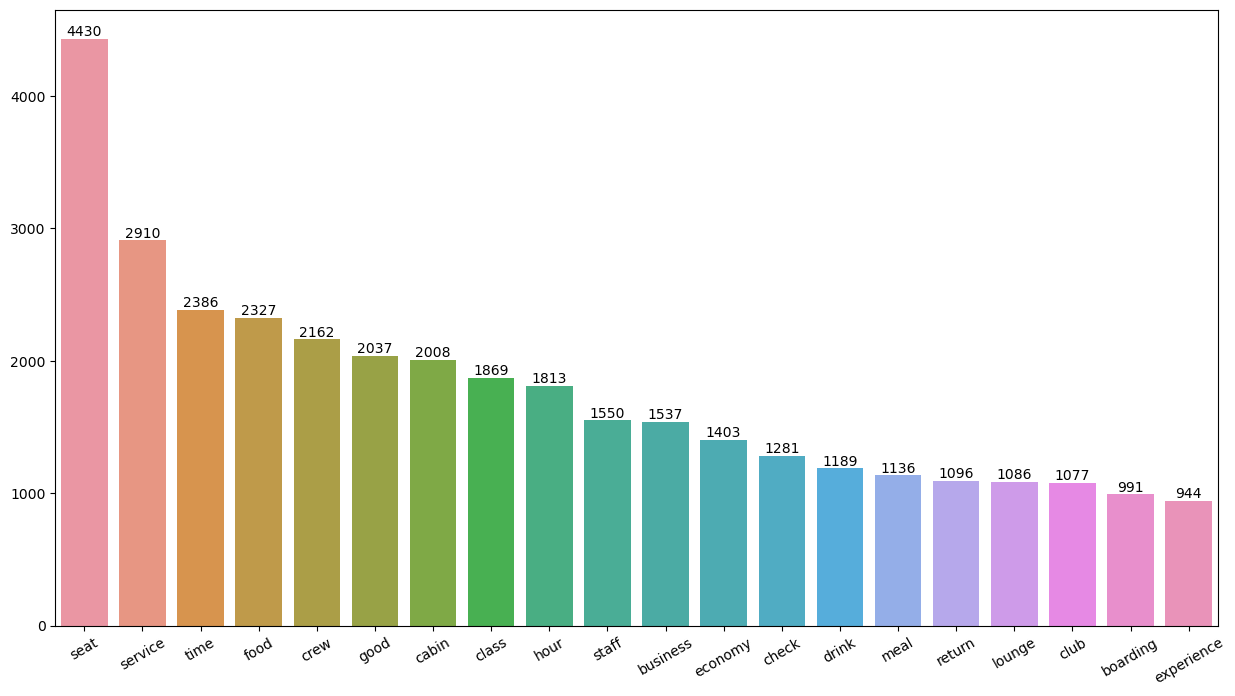

In [65]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

In [66]:
# Word Frequency with N-gram

In [67]:
import nltk.collocations as collocations
from nltk import FreqDist,bigrams
from nltk import ngrams

<Axes: >

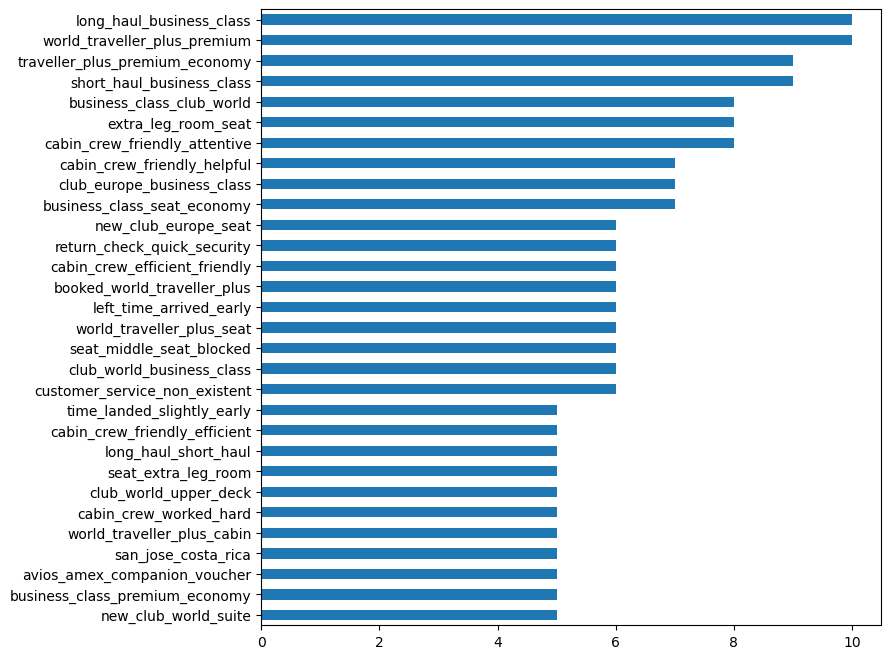

In [68]:
reviews = " ".join(ba_data.corpus)
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams):
    from nltk import ngrams
    
    ngrams = ngrams(new_words, number_of_ngrams)
    
    ngram_fd = FreqDist(ngrams).most_common(30)
    
    ngram_sorted = {k:v for k,v in sorted(ngram_fd,key=lambda item:item[1])}
    
    ngram_joined =  {'_'.join(k):v for k,v in sorted(ngram_fd,key = lambda item:item[1])}
    
    ngram_freqdist = pd.Series(ngram_joined)
    
    plt.figure(figsize=(8,8))
    
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)
    

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [69]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 0 to 3620
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   review    3616 non-null   object        
 1   stars     3616 non-null   object        
 2   date      3616 non-null   datetime64[ns]
 3   country   3616 non-null   object        
 4   verified  3616 non-null   bool          
 5   corpus    3616 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 173.0+ KB


In [70]:
ba_data['stars'] = ba_data['stars'].astype('int')

In [71]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 0 to 3620
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   review    3616 non-null   object        
 1   stars     3616 non-null   int32         
 2   date      3616 non-null   datetime64[ns]
 3   country   3616 non-null   object        
 4   verified  3616 non-null   bool          
 5   corpus    3616 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 158.9+ KB


In [72]:
ratings_1_3 = ba_data[ba_data.stars.isin([1,2,3])]
ratings_4_6 = ba_data[ba_data.stars.isin([4,5,6])]
ratings_7_10 = ba_data[ba_data.stars.isin([7,8,9,10])]

In [73]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

In [74]:
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

<Axes: >

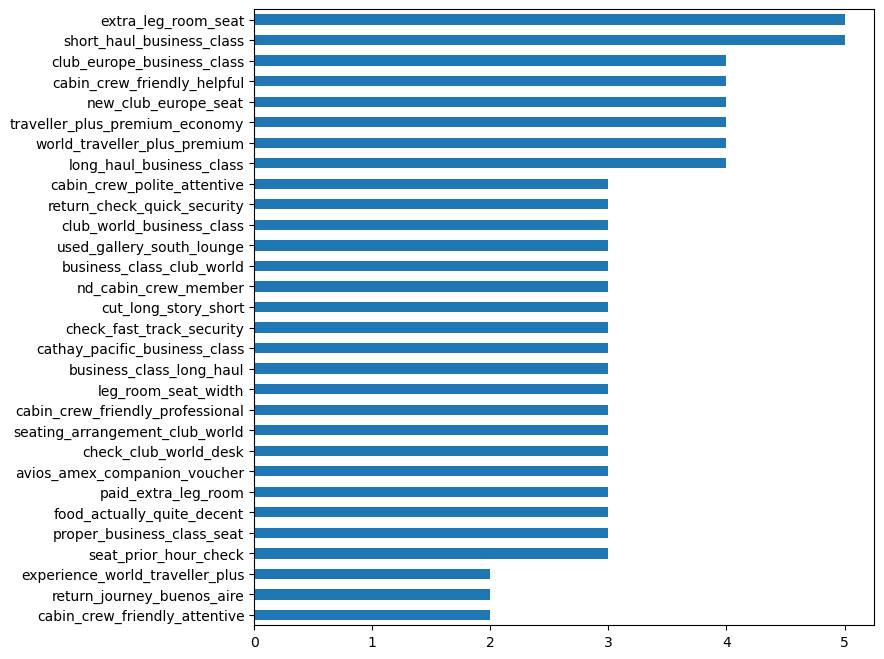

In [75]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words_7_10,4)

<Axes: >

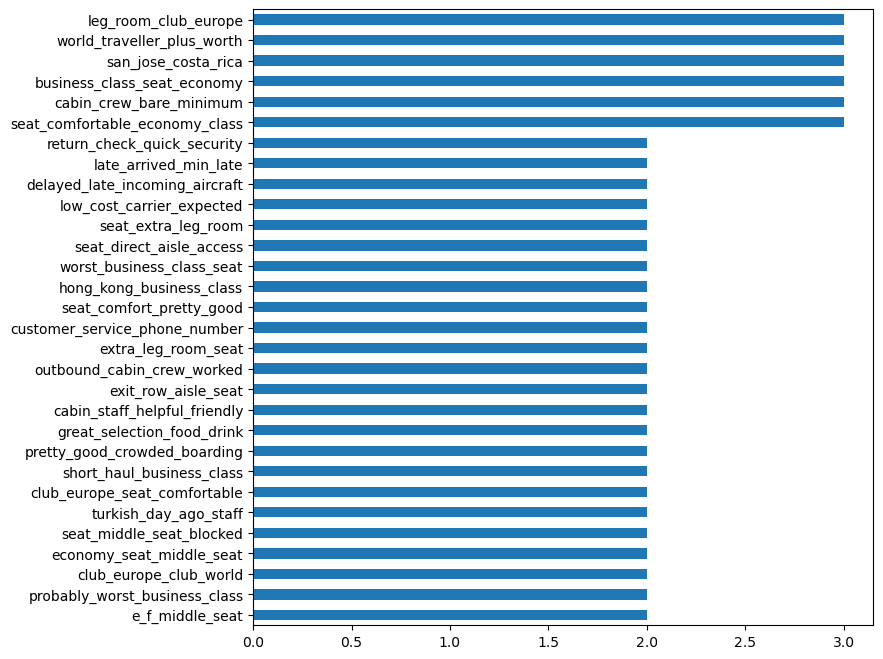

In [76]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words_4_6,4)

<Axes: >

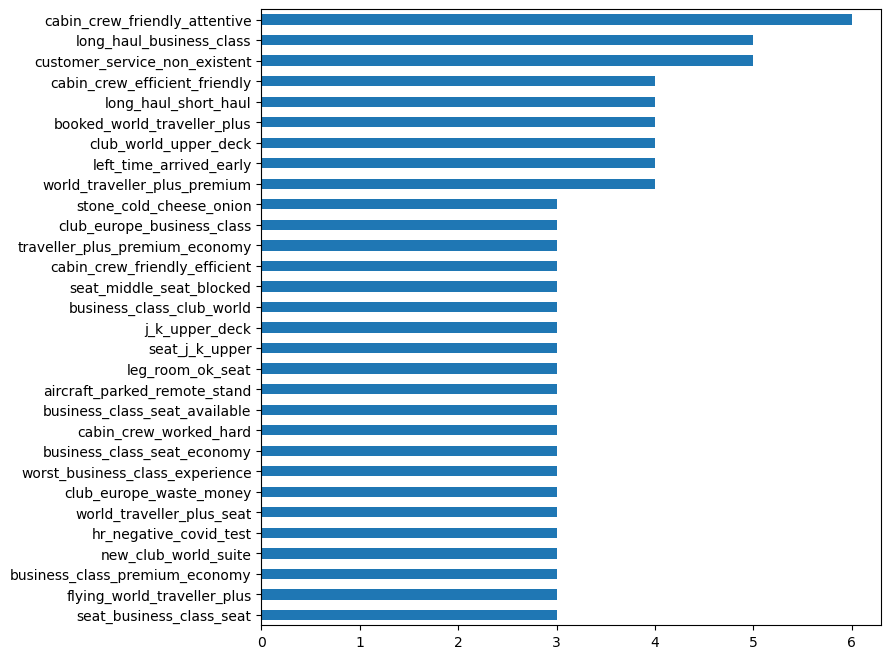

In [77]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words_1_3,4)

In [78]:

!pip install textblob

In [79]:
%%capture

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [82]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [86]:
len(ba_data.corpus)

3616

In [89]:
ba_data.corpus[0]

'good domestic flight operated ba cityflyer ground service check edinburgh airport particularly friendly helpful flight departed time arrived earlier scheduled complimentary drink snack albeit tiny served generally seems quality cityflyer subsidiary superior mainline british airway flight'

In [106]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
ba_data['label'] = 0
    
for i in range(0,3078):
    
    score = vds.polarity_scores(ba_data.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        ba_data['label'][i] = 1
        #print("1st")
    elif score < 0:
        ba_data['label'][i] = -1
        #print("2nd")
    else:
        ba_data['label'][i] = 0

In [104]:
ba_data.label.value_counts()

 1    1931
-1    1035
 0     650
Name: label, dtype: int64

In [107]:
# Topic Modelling with lda

UsageError: %%capture is a cell magic, but the cell body is empty.


In [113]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(ba_data.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [115]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
ba_data_topic =pd.DataFrame(topic_dict)

In [116]:
ba_data_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0            ba           650.9          seat          1804.2        flight   
1        flight           574.3        flight          1271.0            ba   
2         class           516.1          food           931.6          time   
3          food           514.3          good           839.9          crew   
4       service           507.2          meal           778.4          good   
5          crew           418.6            ba           739.3         check   
6         cabin           417.3       economy           618.1       service   
7       british           383.2       service           615.4      boarding   
8        airway           377.3         cabin           592.5      heathrow   
9      business           368.1          crew           556.9        london   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          2292.3        notice             7.8        flight          1011.0   
1           870.1        pillow             7.3            ba           776.5   
2           825.4           jfk             6.7          told           595.6   
3           749.3           lhr             6.5          hour           580.5   
4           711.0        travel             6.3           get           438.6   
5           701.2        routed             5.9         would           424.2   
6           689.8        flight             5.3           day           373.3   
7           617.5     scheduled             5.0          time           329.2   
8           496.2           lax             4.8        london           324.1   
9           489.6       husband             4.7           one           323.9   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0            ba           625.6        flight          1554.4          seat   
1        flight           343.3          seat           746.5         class   
2       airline           303.4        airway           682.2            ba   
3       british           210.2       british           677.4        flight   
4        airway           205.8            ba           566.9      business   
5        london           200.7       airline           550.6         cabin   
6          year           198.0       service           486.4     passenger   
7       economy           187.9      customer           437.9          crew   
8          seat           181.8        london           384.4          food   
9       service           162.2          hour           345.8           lhr   

  Topic 7 weights  
0          1007.5  
1           721.9  
2           640.0  
3           629.4  
4           602.5  
5           412.4  
6           387.1  
7           363.9  
8           300.6  
9           298.0